# Analyzing salary survey and predicting salary using a linear regression 


The original dataset comes from the Ask a Manager Survey

> The salary survey a few weeks ago got a huge response — 24,000+ people shared their salaries and other info, which is a lot of raw data to sift through. Reader Elisabeth Engl kindly took the raw data and analyzed some of the trends in it and here’s what she found. (She asked me to note that she did this as a fun project to share some insights from the survey, rather than as a paid engagement.)

> This data does not reflect the general population; it reflects Ask a Manager readers who self-selected to respond, which is a very different group (as you can see just from the demographic breakdown below, which is very white and very female).



The cleaned dataset is provided by the [Tidy Tuesday project](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-05-18/readme.md)

## Loading the data


In [16]:
import fsspec
import pandas as pd
from plotnine import (
    ggplot,
    geom_point,
    aes,
    stat_smooth,
    facet_wrap,
    scale_x_log10,
    geom_histogram,
    labels,
    labs,
)
import janitor
import proplot as pplt

In [5]:
# instantiate an fsspec filesystem object w/ caching enabled
fs = fsspec.filesystem("filecache", target_protocol="https", cache_storage="/tmp/files")

# load the data into pandas
df = pd.read_csv(
    fs.open(
        'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-18/survey.csv'
    ),
    parse_dates=['timestamp'],
)
df.head()

,timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


This dataset has 18 columns:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26232 entries, 0 to 26231
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   timestamp                                 26232 non-null  datetime64[ns]
 1   how_old_are_you                           26232 non-null  object        
 2   industry                                  26173 non-null  object        
 3   job_title                                 26232 non-null  object        
 4   additional_context_on_job_title           6763 non-null   object        
 5   annual_salary                             26232 non-null  int64         
 6   other_monetary_comp                       19447 non-null  float64       
 7   currency                                  26232 non-null  object        
 8   currency_other                            166 non-null    object        
 9   additional_context_on_income

In [17]:
df.isna().sum()

timestamp                                       0
how_old_are_you                                 0
industry                                       59
job_title                                       0
additional_context_on_job_title             19469
annual_salary                                   0
other_monetary_comp                          6785
currency                                        0
currency_other                              26066
additional_context_on_income                23360
country                                         0
state                                        4687
city                                           78
overall_years_of_professional_experience        0
years_of_experience_in_field                    0
highest_level_of_education_completed          196
gender                                        148
race                                          146
dtype: int64

let's look at the demographics of the population sample that participated in this survey

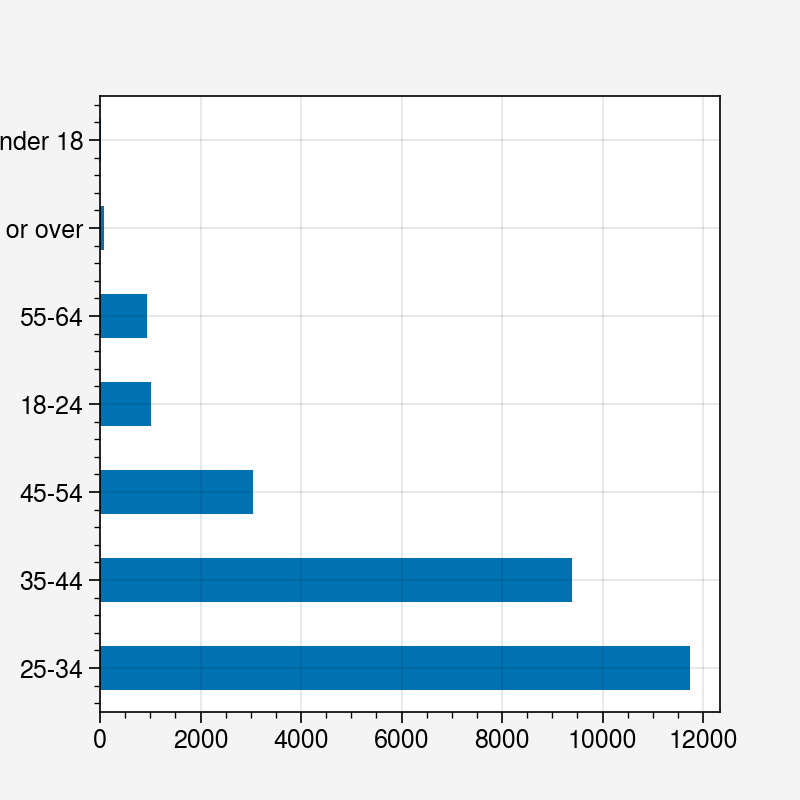

In [19]:
df.how_old_are_you.value_counts().plot(kind='barh');

- as we can see, most of the respondents are aged between `25-34` years

<AxesSubplot:>

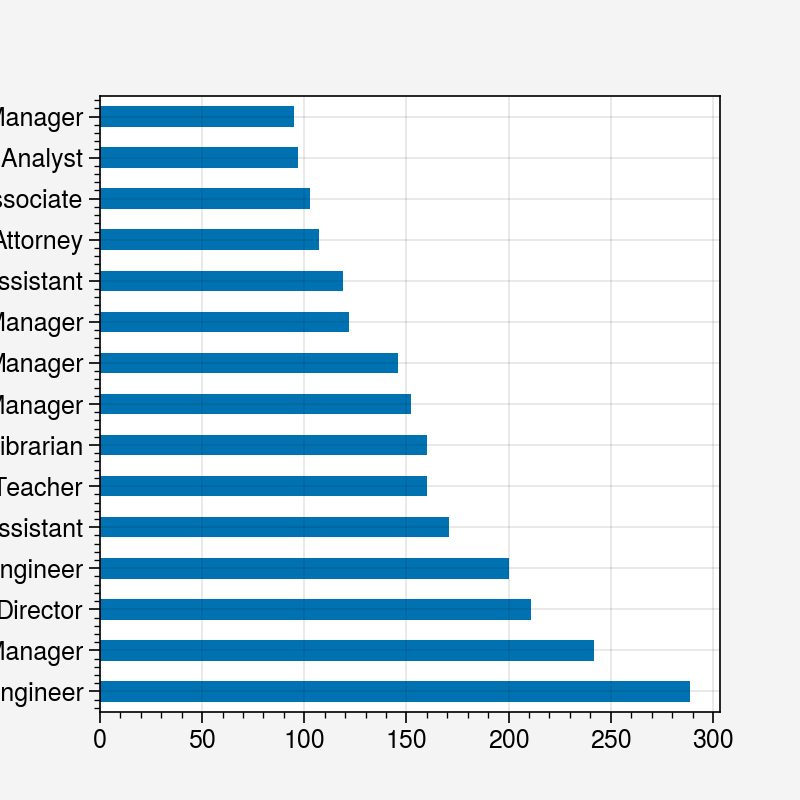

In [25]:
df.job_title.value_counts()[:15].plot(kind='barh')

- by looking at the `job title`, it appears we have more responses from software engineers. let's look at the industry category

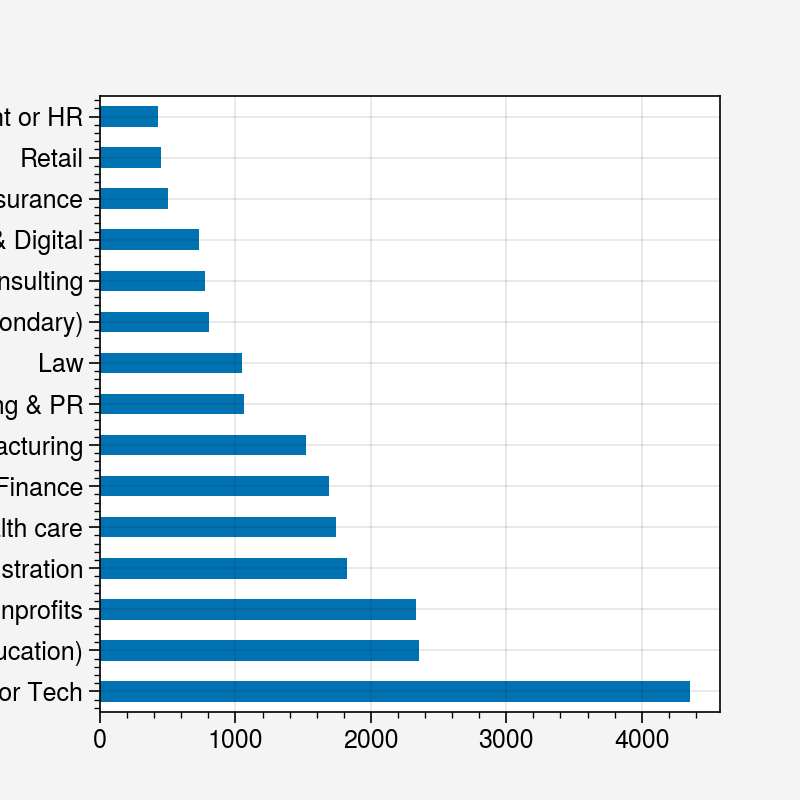

In [30]:
df.industry.value_counts()[:15].plot(kind='barh');

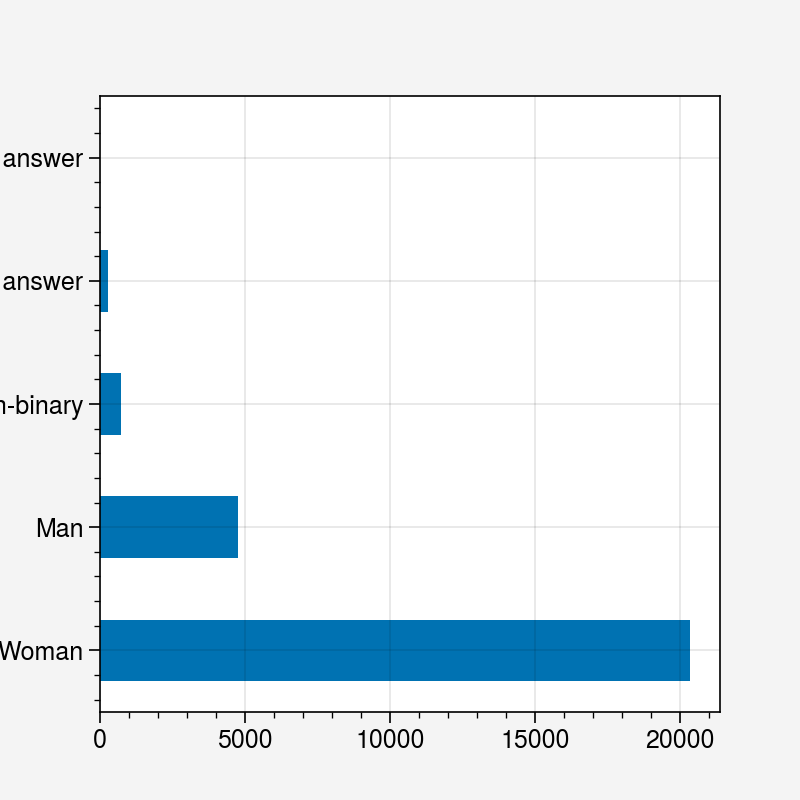

In [33]:
df.gender.value_counts().plot(kind='barh');

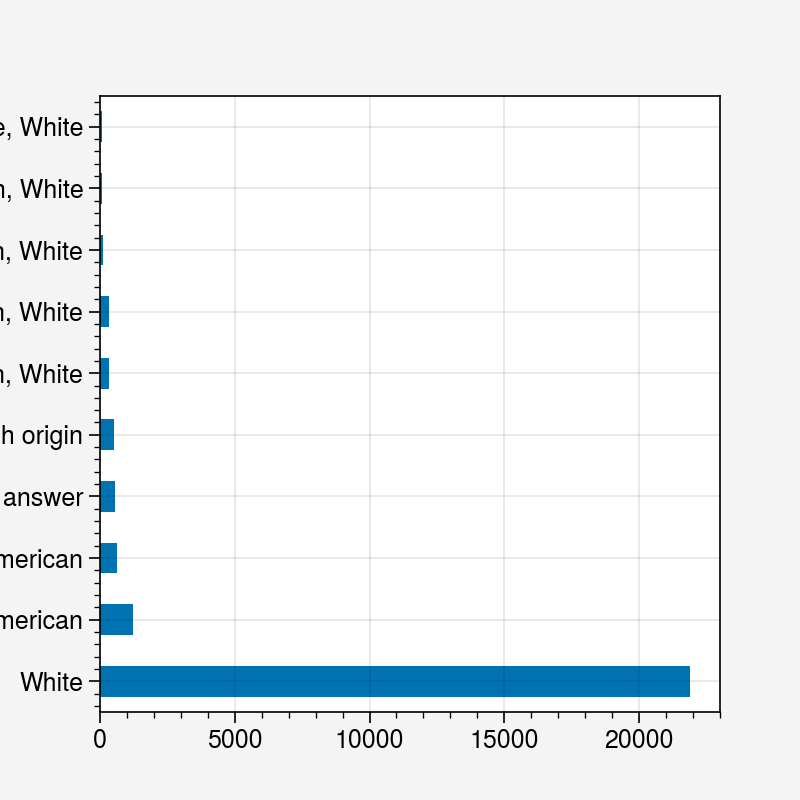

In [37]:
df.race.value_counts()[:10].plot(kind='barh');

<AxesSubplot:>

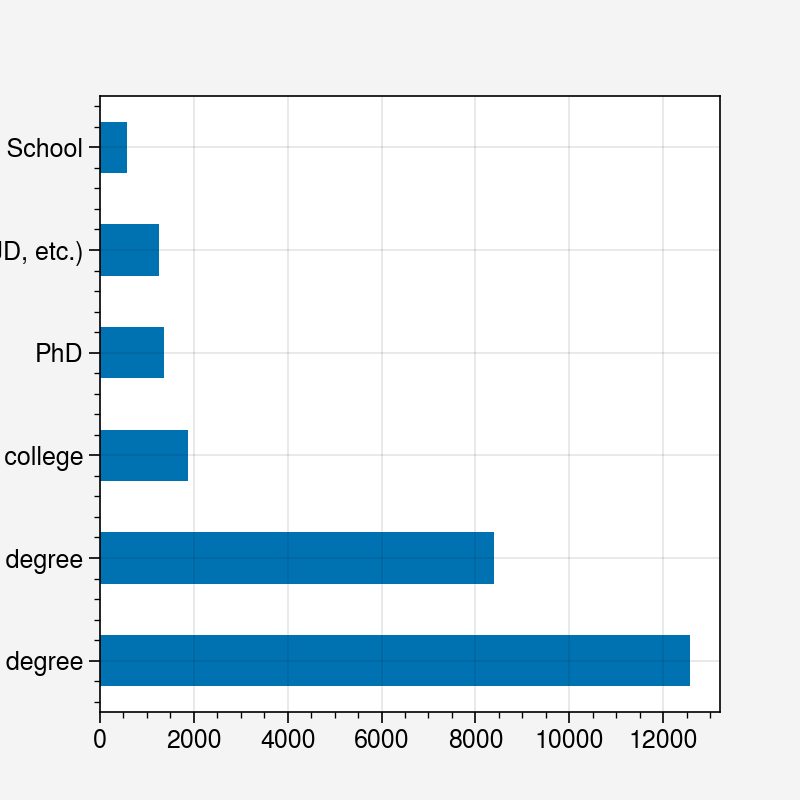

In [44]:
df.highest_level_of_education_completed.value_counts().plot(kind='barh')

In [91]:
data_usd = (df
        .filter_on("currency == 'USD'")
        .filter_on("annual_salary >= 5000")
        .filter_on("annual_salary <= 2e6")
        .
       )
data_usd.head()

,timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,2021-04-27 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000,NaN,USD,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White


/home/andersy005/mambaforge/envs/cu/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 123'. Pick better value with 'binwidth'.


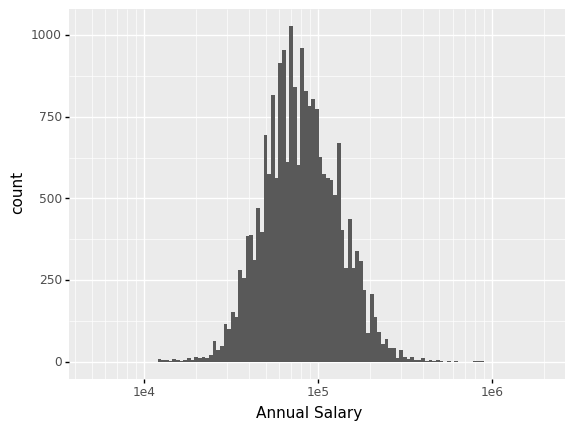

<ggplot: (8776320920051)>

In [94]:
(
    ggplot(data_usd, aes('annual_salary'))
    + geom_histogram()
    + scale_x_log10()
    + labs(x="Annual Salary")
)

In [95]:
data_usd.state.value_counts()

California                 2423
New York                   2036
Massachusetts              1453
Texas                      1168
Illinois                   1125
                           ... 
Nevada, Oregon                1
New Jersey, Virginia          1
Montana, Wyoming              1
Colorado, Massachusetts       1
Oregon, Washington            1
Name: state, Length: 124, dtype: int64

In [45]:
mtcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
